<a href="https://colab.research.google.com/github/SethSekyere/SethMLClass/blob/main/My_Stock_Trading_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Importing necessary libraries
import yfinance as yf  # Library for fetching historical stock data
import pandas as pd  # Library for data manipulation and analysis
import os  # Library for interacting with the operating system
import matplotlib.pyplot as plt  # Library for data visualization


In [75]:
# Retrieving data for the S&P 500 index using the yfinance library
sp500 = yf.Ticker("^GSPC")


In [76]:
# Fetching historical stock price data for the S&P 500 index
sp500 = sp500.history(period="max")


In [77]:
#display the historical stock price data for the S&P 500 index.
sp500


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000,0.0,0.0
2024-04-16 00:00:00-04:00,5064.589844,5079.839844,5039.830078,5051.410156,4006200000,0.0,0.0
2024-04-17 00:00:00-04:00,5068.970215,5077.959961,5007.250000,5022.209961,3596130000,0.0,0.0


In [78]:
#display the index of the DataFrame containing the historical stock price data for the S&P 500 index
sp500.index


DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-04-08 00:00:00-04:00', '2024-04-09 00:00:00-04:00',
               '2024-04-10 00:00:00-04:00', '2024-04-11 00:00:00-04:00',
               '2024-04-12 00:00:00-04:00', '2024-04-15 00:00:00-04:00',
               '2024-04-16 00:00:00-04:00', '2024-04-17 00:00:00-04:00',
               '2024-04-18 00:00:00-04:00', '2024-04-19 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24191, freq=None)

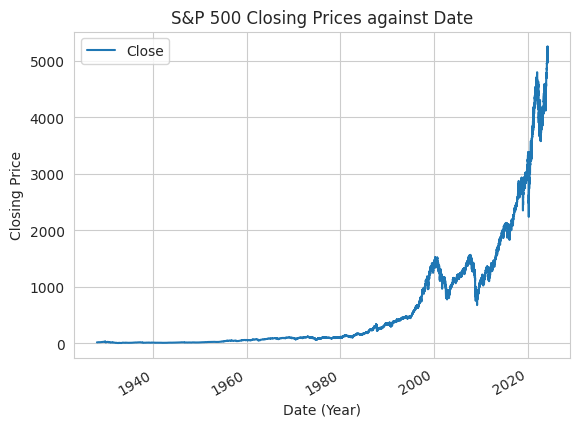

In [79]:
# Visualizing the data by plotting the closing price against index
sp500.plot.line(y="Close", use_index=True)

# Setting title, xlabel, and ylabel for the plot
plt.title('S&P 500 Closing Prices against Date')
plt.xlabel('Date (Year)')
plt.ylabel('Closing Price')

# Displaying the plot
plt.show()


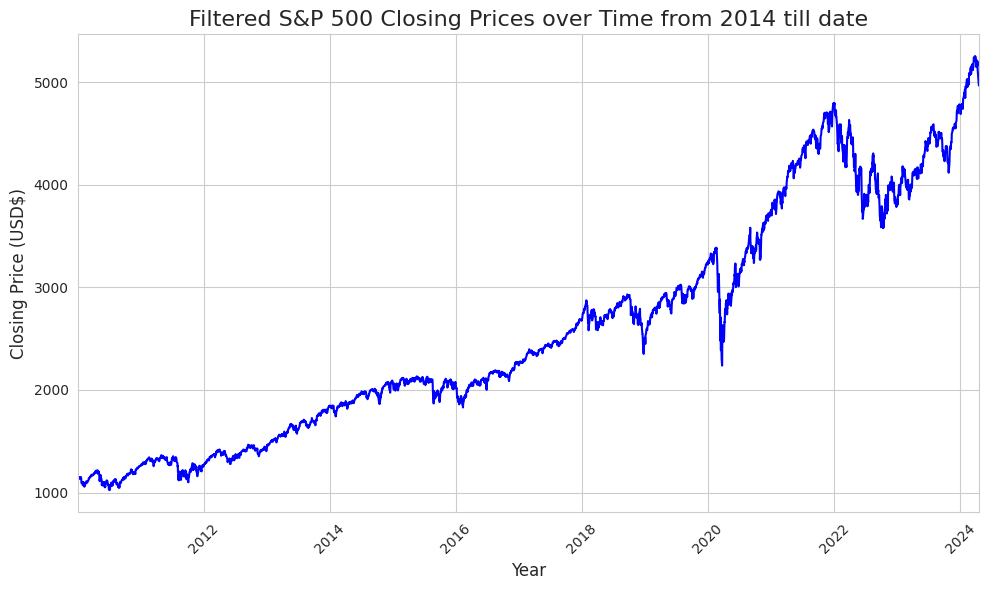

In [80]:
# Importing necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame to start from 2010
sp500_filtered = sp500[sp500.index.year >= 2010]

# Setting the style using seaborn
sns.set_style("whitegrid")

# Creating a new figure with specified size
plt.figure(figsize=(10, 6))

# Plotting the filtered data using seaborn's lineplot
sns.lineplot(data=sp500_filtered, x=sp500_filtered.index, y="Close", color='blue')

# Setting title and labels for the plot
plt.title('Filtered S&P 500 Closing Prices over Time from 2014 till date', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (USD$)', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Setting x-axis limits to start from the earliest date in the filtered data
plt.xlim(sp500_filtered.index.min(), sp500_filtered.index.max())

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

# Displaying the plot
plt.show()


In [81]:
#Deleting unwanted columns of Dividends and Stocks since they will not be used in predicting the price of stock
del sp500["Dividends"]
del sp500["Stock Splits"]

# Displaying the DataFrame after deletion
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000
2024-04-16 00:00:00-04:00,5064.589844,5079.839844,5039.830078,5051.410156,4006200000
2024-04-17 00:00:00-04:00,5068.970215,5077.959961,5007.250000,5022.209961,3596130000


Now we introduce Machine Learning to help predict whether the price will go up or down


In [82]:
#We create a column for tomorrow
#Using pandas we take the close columns and shift them back one day to obtain that for tomorrow
##For example we see that the (tomorrow price for day "A" becomes the closing price for day "A+1")
#since our target variable is tomorrow's price




# Creating a new column "Tomorrow" by shifting the "Close" column back by one day
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [83]:
#viewing the current data
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000,5051.410156
2024-04-16 00:00:00-04:00,5064.589844,5079.839844,5039.830078,5051.410156,4006200000,5022.209961
2024-04-17 00:00:00-04:00,5068.970215,5077.959961,5007.250000,5022.209961,3596130000,5011.120117


Based on tomorrows price, we can set a target. The target is what we can predict with machine learning.
The target will output integer type.
1 when tomorrow's price is greater than today's closing price and 0 for vice versa

In [84]:
# Creating a new column called "Target"
# The "Target" column represents whether the stock price increased or decreased compared to the previous day

# Creating the "Target" column by comparing tomorrow's closing price with today's closing price
# If tomorrow's closing price is greater than today's closing price, the value in "Target" is set to 1 (indicating an increase)
# If tomorrow's closing price is less than or equal to today's closing price, the value in "Target" is set to 0 (indicating no increase)
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)


In [85]:
#
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000,5051.410156,0
2024-04-16 00:00:00-04:00,5064.589844,5079.839844,5039.830078,5051.410156,4006200000,5022.209961,0
2024-04-17 00:00:00-04:00,5068.970215,5077.959961,5007.250000,5022.209961,3596130000,5011.120117,0


Now we have to take some dates off since very old data figures may affect the prediction since many things have changed in the market. So we take data from 2010 January 1st


In [86]:
# Filtering the DataFrame to include data from January 1, 2010, onwards
sp500 = sp500.loc["2010-01-01":].copy()

# Displaying the filtered DataFrame
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-01-04 00:00:00-05:00,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,1136.520020,1
2010-01-05 00:00:00-05:00,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,1137.140015,1
2010-01-06 00:00:00-05:00,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,1141.689941,1
2010-01-07 00:00:00-05:00,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,1144.979980,1
2010-01-08 00:00:00-05:00,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,1146.979980,1
...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000,5051.410156,0
2024-04-16 00:00:00-04:00,5064.589844,5079.839844,5039.830078,5051.410156,4006200000,5022.209961,0
2024-04-17 00:00:00-04:00,5068.970215,5077.959961,5007.250000,5022.209961,3596130000,5011.120117,0


Now we train an initial Machine Learning Model. I will use a Random Forest Classifier.
Random Forest works by training a number of individual decision trees with randomized parameters and averaging the results from the decision trees. Hence,it is quite resistant to overfitting. They run relatively quickly and can pick up non-linear tendencies in the data. For example Open price is not linearly correlated with target

In [87]:
# Importing the RandomForestClassifier class from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier

# Creating a RandomForestClassifier model with specified hyperparameters
model = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=1)

# Splitting the data into training and testing sets
# We use all the data except the last 100 rows for training and the last 100 rows for testing
train = sp500.iloc[:-100]  # Data for training (excluding the last 100 rows)
test = sp500.iloc[-100:]   # Data for testing (last 100 rows)

# Defining the predictors/features used for training the model
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Training the RandomForestClassifier model using the training data
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=5, random_state=1)

In [88]:
# Importing the precision_score function from scikit-learn.metrics module
from sklearn.metrics import precision_score

# Predicting the target variable (stock price increase or decrease) for the test data using the trained model
preds = model.predict(test[predictors])

# Viewing the predictions
preds


array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
# Formatting the predictions into a Pandas Series with index aligned with the dates of the test data
preds = pd.Series(preds, index=test.index)

# Viewing the predictions
preds


Date
2023-11-27 00:00:00-05:00    1
2023-11-28 00:00:00-05:00    1
2023-11-29 00:00:00-05:00    0
2023-11-30 00:00:00-05:00    0
2023-12-01 00:00:00-05:00    1
                            ..
2024-04-15 00:00:00-04:00    0
2024-04-16 00:00:00-04:00    0
2024-04-17 00:00:00-04:00    0
2024-04-18 00:00:00-04:00    0
2024-04-19 00:00:00-04:00    0
Length: 100, dtype: int64

In [90]:
# Calculating the precision of the model's predictions
precision = precision_score(test["Target"], preds)

# Printing the precision value
print("Precision:", precision)


Precision: 0.7


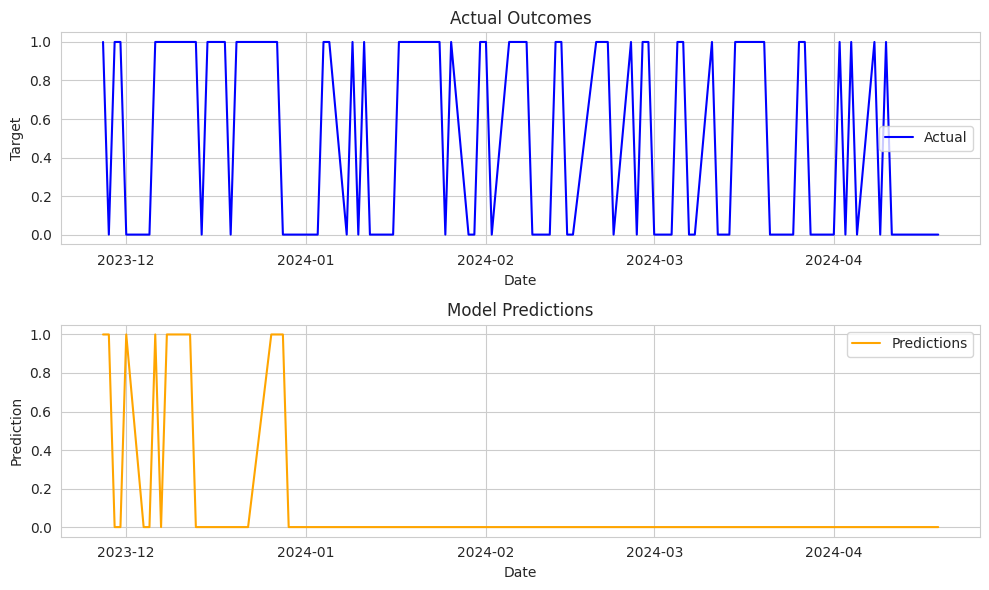

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot actual outcomes
plt.subplot(2, 1, 1)
plt.plot(test.index, test["Target"], label="Actual", color="blue")
plt.title("Actual Outcomes")
plt.xlabel("Date")
plt.ylabel("Target")
plt.legend()

# Plot predictions
plt.subplot(2, 1, 2)
plt.plot(test.index, preds, label="Predictions", color="orange")
plt.title("Model Predictions")
plt.xlabel("Date")
plt.ylabel("Prediction")
plt.legend()

plt.tight_layout()
plt.show()


In [92]:
def predict(train, test, predictors, model):
    """
    Function to train a machine learning model, make predictions on test data,
    and combine them with actual target values.

    Parameters:
        train (DataFrame): Training data containing predictor variables and target variable.
        test (DataFrame): Test data containing predictor variables and target variable.
        predictors (list): List of predictor variables used for training the model.
        model (object): Machine learning model to be trained and used for prediction.

    Returns:
        combined (DataFrame): DataFrame containing actual target values and model predictions.
    """
    # Training the machine learning model
    model.fit(train[predictors], train["Target"])

    # Making predictions on the test data
    preds = model.predict(test[predictors])

    # Creating a Pandas Series for predictions with index aligned to test data index
    preds = pd.Series(preds, index=test.index, name="Predictions")

    # Combining actual target values and model predictions into a DataFrame
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined


In [93]:
def backtest(data, model, predictors, start=2500, step=250):
    """
    Function to perform backtesting for a machine learning model across multiple years.

    Parameters:
        data (DataFrame): Historical data containing predictor variables and target variable.
        model (object): Machine learning model to be used for prediction.
        predictors (list): List of predictor variables used for training the model.
        start (int): Index to start backtesting from in the historical data. Default is 2500.
        step (int): Size of the rolling window for backtesting. Default is 250.

    Returns:
        all_predictions (DataFrame): DataFrame containing all predictions made during backtesting.
    """
    all_predictions = []

    # Looping across data year by year
    for i in range(start, data.shape[0], step):
        # Slice the data for training and testing
        train = data.iloc[0:i].copy()            # Historical data up to the current year
        test = data.iloc[i:(i+step)].copy()      # Data for the current year
        # Make predictions for the current year using the predict function
        predictions = predict(train, test, predictors, model)
        # Append predictions for the current year to the list
        all_predictions.append(predictions)

    # Concatenate all predictions into a single DataFrame
    return pd.concat(all_predictions)


In [94]:
#The backtest function has been called with the historical data (sp500)
# backtesting using a rolling window approach, where predictions are made year by year

predictions = backtest(sp500, model, predictors)

In [95]:
# calculates the count of each type of prediction made during the backtesting process
#How many types each prediction was made

predictions["Predictions"].value_counts()

Predictions
0    609
1    489
Name: count, dtype: int64

In [96]:
#Prediction score
#calculates the precision score of the model's predictions during the backtesting process

precision_score(predictions["Target"], predictions["Predictions"])

0.5255623721881391

In [97]:
#Percentage of days prediction went up
#calculates the percentage of days where the actual target value was positive (indicating an increase in stock price) during the backtesting process

predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.530055
0    0.469945
Name: count, dtype: float64

In [98]:
# List of time horizons for rolling averages
horizons = [2, 5, 60, 250, 1000]

# List to store names of new predictors
new_predictors = []

# Loop through each time horizon
for horizon in horizons:
    # Calculate rolling averages for the specified horizon
    rolling_averages = sp500.rolling(horizon).mean()

    # Create a new column for the ratio of today's closing price to the rolling average
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    # Create a new column for the trend over the specified horizon
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    # Add new predictor column names to the list
    new_predictors += [ratio_column, trend_column]


In [99]:
#drops rows with missing values in columns other than the "Tomorrow" column in the DataFrame sp500

sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [100]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2013-12-23 00:00:00-05:00,1822.920044,1829.750000,1822.920044,1827.989990,2851540000,1833.319946,1,1.002652,2.0,1.010212,3.0,1.037942,33.0,1.116595,145.0,1.348619,557.0
2013-12-24 00:00:00-05:00,1828.020020,1833.319946,1828.020020,1833.319946,1307630000,1842.020020,1,1.001456,2.0,1.007332,4.0,1.039475,34.0,1.118715,146.0,1.351857,557.0
2013-12-26 00:00:00-05:00,1834.959961,1842.839966,1834.959961,1842.020020,1982270000,1841.400024,0,1.002367,2.0,1.008635,4.0,1.042959,34.0,1.122820,147.0,1.357566,557.0
2013-12-27 00:00:00-05:00,1842.969971,1844.890015,1839.810059,1841.400024,2052920000,1841.069946,0,0.999832,1.0,1.004796,4.0,1.041158,34.0,1.121306,146.0,1.356410,556.0
2013-12-30 00:00:00-05:00,1841.469971,1842.469971,1838.770020,1841.069946,2293860000,1848.359985,1,0.999910,0.0,1.002128,3.0,1.039381,34.0,1.120072,145.0,1.355472,555.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15 00:00:00-04:00,5149.669922,5168.430176,5052.470215,5061.819824,3950210000,5051.410156,0,0.993953,0.0,0.982693,2.0,0.997313,33.0,1.106866,137.0,1.228850,532.0
2024-04-16 00:00:00-04:00,5064.589844,5079.839844,5039.830078,5051.410156,4006200000,5022.209961,0,0.998971,0.0,0.986745,1.0,0.994570,32.0,1.103724,136.0,1.225664,531.0
2024-04-17 00:00:00-04:00,5068.970215,5077.959961,5007.250000,5022.209961,3596130000,5011.120117,0,0.997101,0.0,0.986375,1.0,0.988264,31.0,1.096512,136.0,1.217946,530.0


In [101]:
#Now we can Improve our model and change some parameters
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [102]:
def predict(train, test, predictors, model):
    """
    Function to train a machine learning model, predict the probability that the stock will go up or down,
    and assign binary predictions based on a predefined threshold probability.

    Parameters:
        train (DataFrame): Training data containing predictor variables and target variable.
        test (DataFrame): Test data containing predictor variables and target variable.
        predictors (list): List of predictor variables used for training the model.
        model (object): Machine learning model to be trained and used for prediction.

    Returns:
        combined (DataFrame): DataFrame containing actual target values and model predictions.
    """
    # Training the machine learning model
    model.fit(train[predictors], train["Target"])

    # Predicting the probability of positive class (stock going up)
    preds = model.predict_proba(test[predictors])[:, 1]

    # Assigning binary predictions based on a predefined threshold probability
    preds[preds >= 0.6] = 1  # If probability is greater than or equal to 0.6, predict as 1 (increase)
    preds[preds < 0.6] = 0    # If probability is less than 0.6, predict as 0 (decrease)

    # Creating a Pandas Series for predictions with index aligned to test data index
    preds = pd.Series(preds, index=test.index, name="Predictions")

    # Combining actual target values and model predictions into a DataFrame
    combined = pd.concat([test["Target"], preds], axis=1)

    return combined


In [103]:

# executes the backtesting process using the updated model and new predictors.

predictions = backtest(sp500, model, new_predictors)


In [104]:
# calculates the counts of each unique value in the "Predictions" column of the DataFrame predictions, which represents the predictions made by the model during the backtesting process

predictions["Predictions"].value_counts()

Predictions
0.0    90
1.0     8
Name: count, dtype: int64

In [105]:
# calculates the precision score of the model's predictions during the backtesting process.

precision_score(predictions["Target"], predictions["Predictions"])

0.625

In [106]:
# calculates the percentage of occurrences for each unique value in the "Target" column of the DataFrame predictions.

predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.540816
0    0.459184
Name: count, dtype: float64

In [107]:
predictions

,Target,Predictions
Date,,
2023-11-29 00:00:00-05:00,1,1.0
2023-11-30 00:00:00-05:00,1,0.0
2023-12-01 00:00:00-05:00,0,0.0
2023-12-04 00:00:00-05:00,0,1.0
2023-12-05 00:00:00-05:00,0,1.0
...,...,...
2024-04-15 00:00:00-04:00,0,0.0
2024-04-16 00:00:00-04:00,0,0.0
2024-04-17 00:00:00-04:00,0,0.0


#For printing


In [108]:
#for printing